# Loan Application Status Prediction

#### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

#### You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [2]:
df = pd.read_csv("D:/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Shape of the dataset

The dataset appears to have a total of 1470 rows and 35 columns including 1 target column

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Preporcessing

### The dataset appears to a few missing values

### This dataset has 4 float datatypes, 1 int datatype and 8 object datatype including the target variable "Loan_Status"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Lets plot a heatmap to identify if any null values

#### We have missing values for the columns "Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term" and "Credit_History"

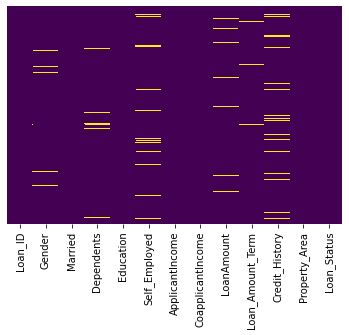

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Let us proceed to fill the missing values

#### We are going to fill all categorical missing values with the mode and all continous missing values with the mean

In [3]:
# filling these continous values using mean

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [4]:
# filling these continous values using mean

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

#### Lets plot a heatmap to identify if any null values after the previous step

<AxesSubplot:>

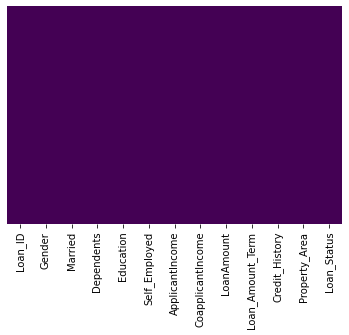

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between the mean and dtd is not correct for columns "ApplicantIncome" and "CoapplicantIncome"

#### The std is higher than mean for these 2 and the data may be incorrect or there coul be some kind of entry error taken palce.

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Lets plot a couple of plots for further understanding

#### The below graph shows us the Loan status of the poulation

#### We can see that the almost 430+ poeple have recieved a go ahead for loan status and about 200 people haven't recieved a go ahead i.e. No

#### The ration of people getting loan is higher. This could mean the person's previous loan  history ( if any), transaction history, minimum balance criteria may all be clear

#### The people who may not have recieved loan could have numerous reasons. Their past loan history, transaction's are not upto the mark against the credit score.

#### Some banks in India have a policy of not granting a loan if the account was newly opened. It common for a salaried employee as due to policies Banks don't let an employee of any company who holds an account if its less than a year. 

#### However the given information is not enough to determine the actual reasons in this case.

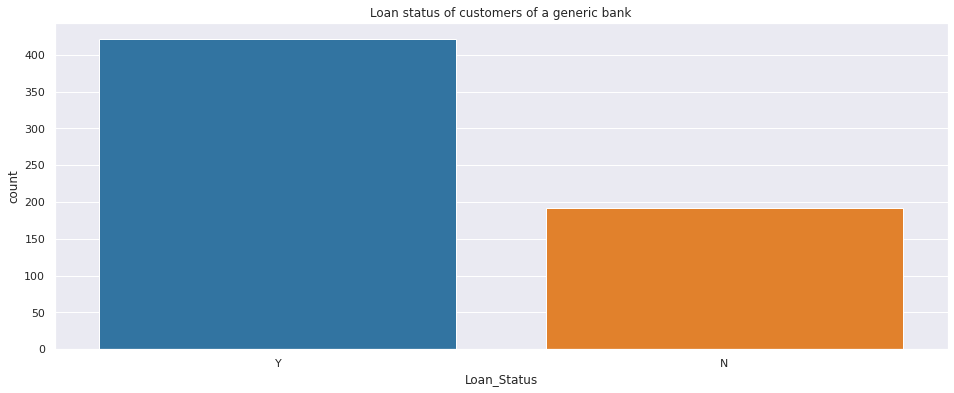

In [13]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Loan_Status", data=df, palette="tab10").set(title='Loan status of customers of a generic bank')

#### Lets now observe if credit score / history has any relationship in getting loan or not

#### We can see the customers with a credit score 1 ( highest) have no issue in getting theloan amout sanctioned.

#### Athough a very few number of customers seem to have gotten their loan approved even though their credid score is less than 1 or even if it's 0.

#### But if we observe the right hand plot that shows loan staus rejected customers count, we can find customers whose loan request was denied even if their credit history was 1.

#### This could imply that only credit score is not enough to determine if a person is eligible to get loan or not and surely other factors like background checks, occupation etc may be considered.

#### It's also a common practice for any bank to keep track of customer records who may have pending loan in other banks. They ahve have defaulted, paid the amount after the deadline, guarenteers may not be credible and hence loan request may have cancelled.

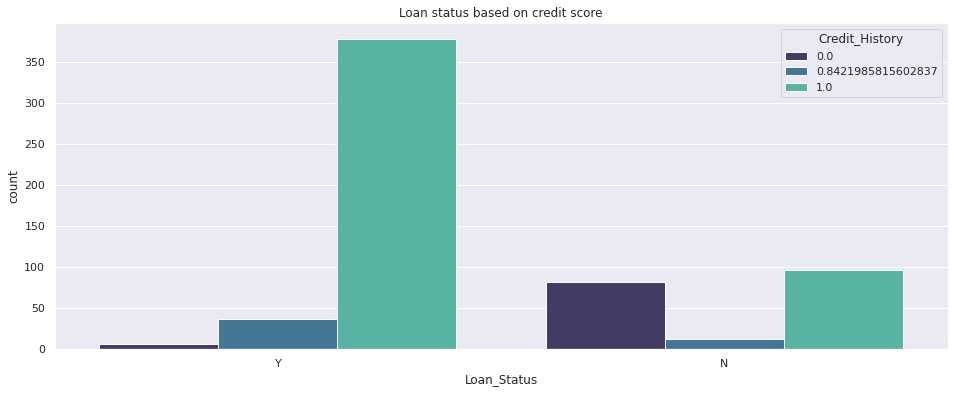

In [14]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Loan_Status", hue="Credit_History",data=df, palette="mako").set(title='Loan status based on credit score')

#### Let's see the marital status of the customers of this generic bank

#### We can see the majority of customers are Married and the loan is obviously necessary with respect to education, personal loan, home loan and many other loans.

#### Not an assumption, but Married person would have more financial needs compared to someone who isn't married.


#### Also loan is the best method to deal with higher financial needs as all your documents are counted for

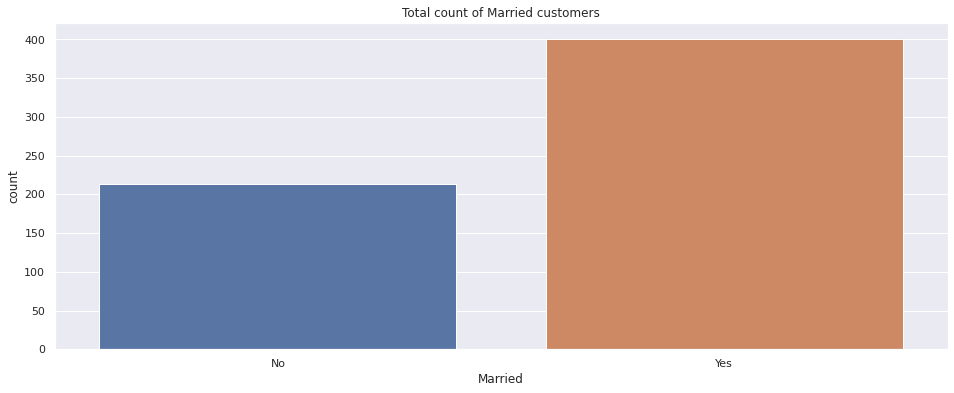

In [15]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Married", data=df).set(title='Total count of Married customers')

#### Let's observe if there is any relationship between a person's marital status and loan sanction

#### We can see from this dataset, customer's who are married have higher rate of loan status approval compared to unmarried customers.

#### This plot could directly relate to teh credibility of guaranteers also. A's person's spouse could be his / her guaranteer in most of the cases, their backgroud is checked throughouly, a proper introductions are given when creating account.


#### Also common loans like car loans, house loans, and these day's marriage loans are also available for people to choose from. 

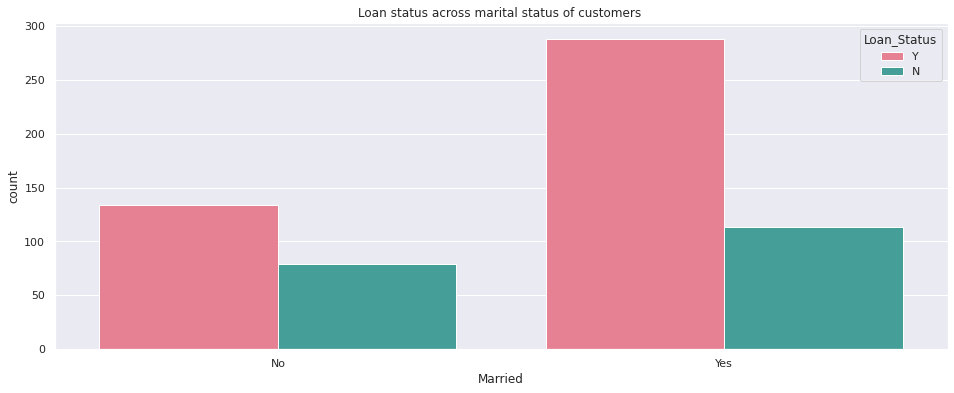

In [16]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Married", hue="Loan_Status", data=df, palette="husl").set(title='Loan status across marital status of customers ')

#### Lets observe if there is any relation between ApplicantIncome and  CoapplicantIncome

#### We can see that co - applicant income also plays an important role in applicant's loan aproval as the guaranteer's /co applicant's income is considered as secondary source of mode of loan payment.

#### If the co applicant has no income. Eg. a Homemaker, then the approval may seem less as the bank has to depend on the applicant only for repayment of loan

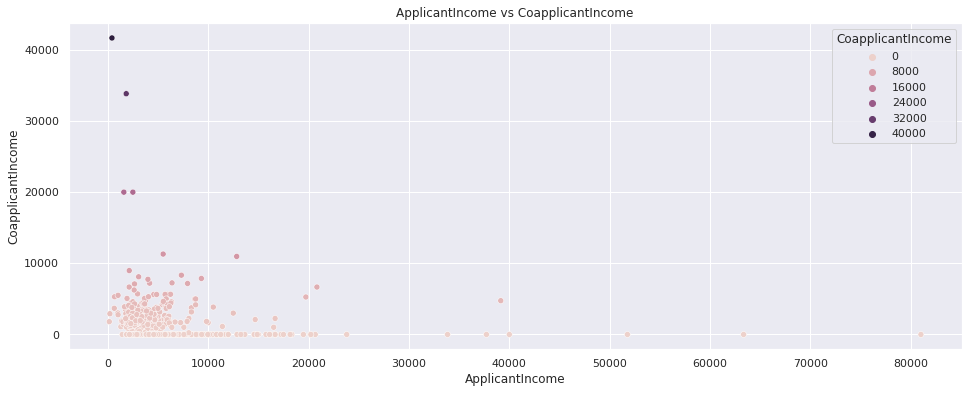

In [17]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="ApplicantIncome", y="CoapplicantIncome", hue="CoapplicantIncome").set(title='ApplicantIncome vs CoapplicantIncome')
plt.show()

#### From the below plot we can observe majority of the customers are not self employed and are salaried employes.

#### The loan approval could be higher for salared employees as their company may be asociated with that bank and it's also evident that the person has a stable job and would not be a defaulter down the line

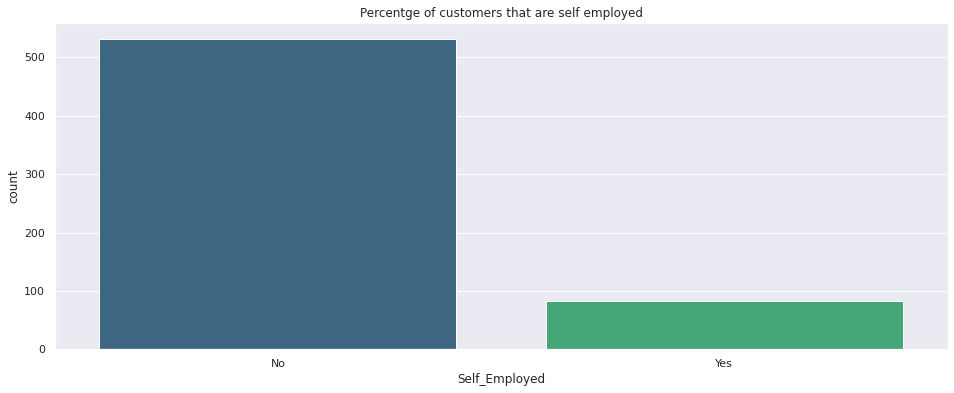

In [18]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Self_Employed",data=df, palette="viridis").set(title='Percentge of customers that are self employed')

#### Let's see if there is an relationship between self employeed occupation type and loan sanction

#### We can see the a very few number of customer recieve loan that are self employed.

#### These self employeed could be free lancers and could also be small time business owners.

####  Being self-employed can affect your credit score and such customers are considered riskier, which in turn will impact your ability as an individual to borrow loan. 

#### Self employed in simple terms could mean variable salary hence loan duration could increase which intern afftects banks credibilty also.

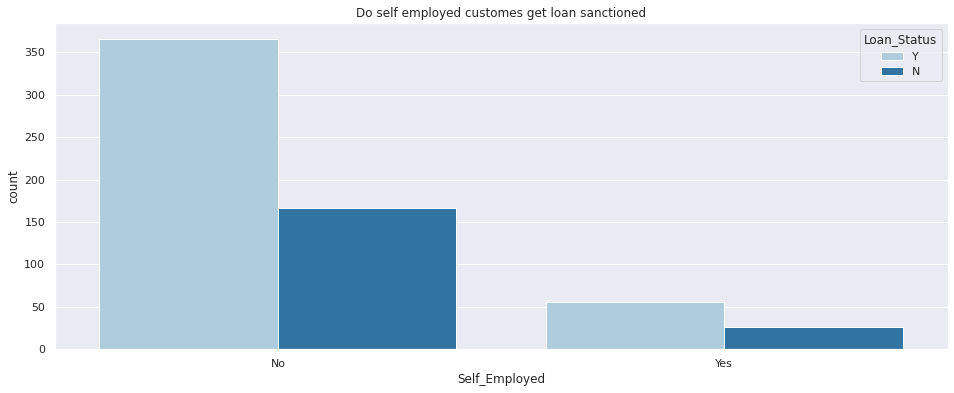

In [19]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette="Paired").set(title='Do self employed customes get loan sanctioned')

#### Let's observe if there is any relationship between a sub geography and loan status

#### We can see customers living in Semi Urban area have high chances of getting their loan status approved and also very less chance of getting loan rejected also.

#### Semi urban areas are generally governed by Municipal Corporation and also have a capability of becoming a metropolitan city.

#### As it's an imroving geography banks like, Nationalized Banks, Private Banks, Credit Societies, Co-operative Banks exist in more numbers and hence loan taking capacity may also increase

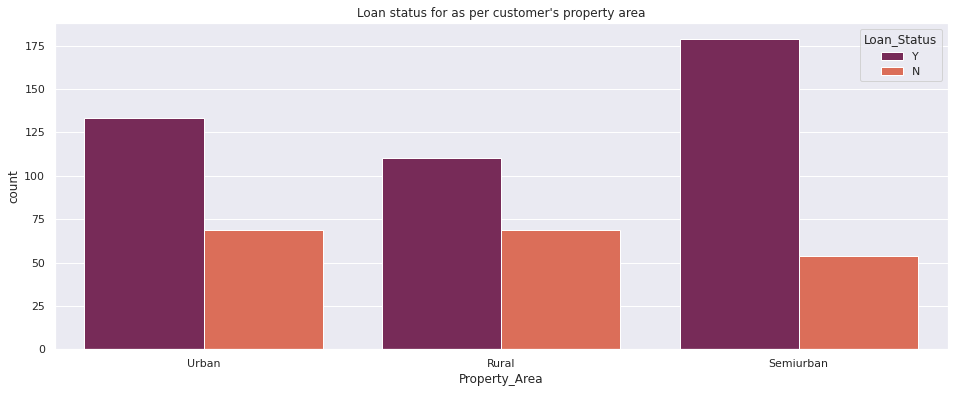

In [20]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="rocket").set(title="Loan status for as per customer's property area")

#### From the above plot we noticed the semi urban area customer have a higher chance of getting loan status approved.

#### But from the below plot we can see the percentage of loan amount is almost same for all categories although Rural area customers have little more than other propery areas


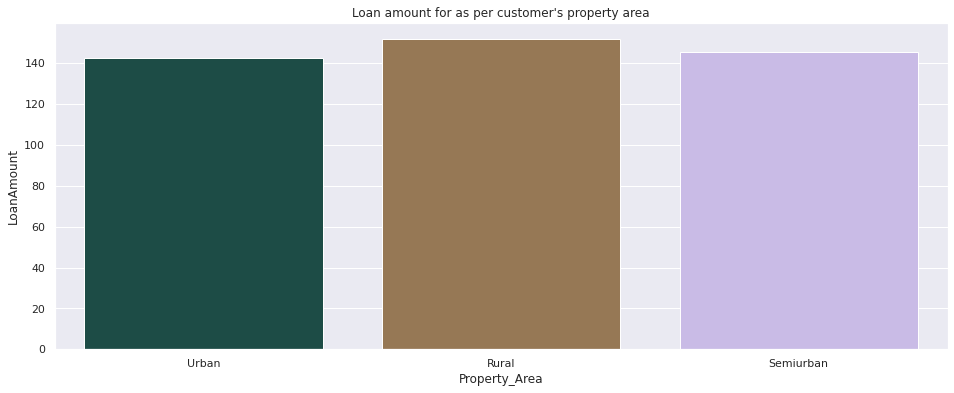

In [21]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Property_Area", y="LoanAmount", data=df, palette="cubehelix", orient="v", ci=None).set(title="Loan amount for as per customer's property area")

#### Let's see the credit score of customers across property area.

#### We in general assume people in urban areas may have a high score as urban areas ahve high paying jobs. But in this case we can see customers living in Rural Areas have a high score of 1 compared to other sub geography customers

#### Agriculture is a huge and a profitable sector. Small scale industries do have a good rate of success and now there are new initiatives that help one get easy loans. This could be the reason in this case.

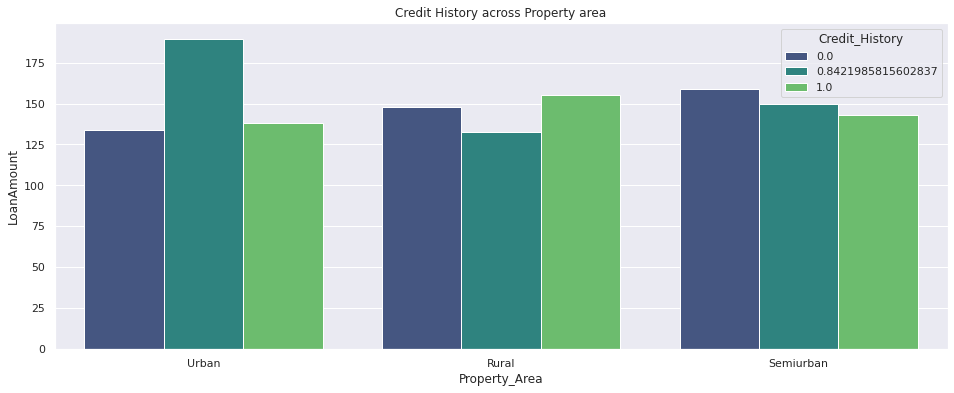

In [22]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Property_Area", y="LoanAmount", hue="Credit_History", data=df, palette="viridis", orient="v", ci=None).set(title='Credit History across Property area')

#### Let's observe if there is any relationship between a person being self emloyed and property area

#### We can see self employement doesn't seem to have much relation across geography and they rarely get loan sanctioned and the policies may remain same across all banks.

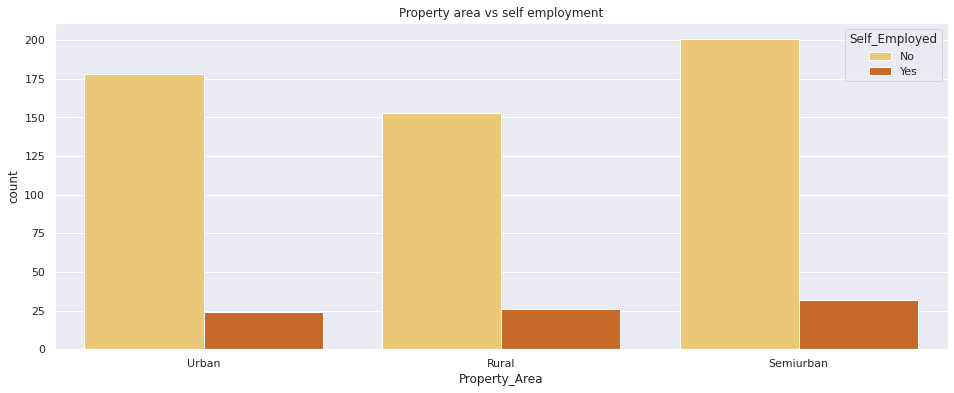

In [23]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Property_Area", hue="Self_Employed", data=df, palette="YlOrBr").set(title='Property area vs self employment')

#### Let's see the loan amout term duration given based on applicant's income

#### We can see in some cases loan amount term is increased base on a person's income but it's not necessarily the same.

#### After a gradual increase there is also a decrease in the appplicat income and increase in loan amout term.

#### Loan duration depends on rate of interest which changes over a year at least. It will also depend on the amout of loan we take and doesn't entirely depend on applicant's income itself

[Text(0.5, 1.0, 'Loan amount term based on the income of applicant')]

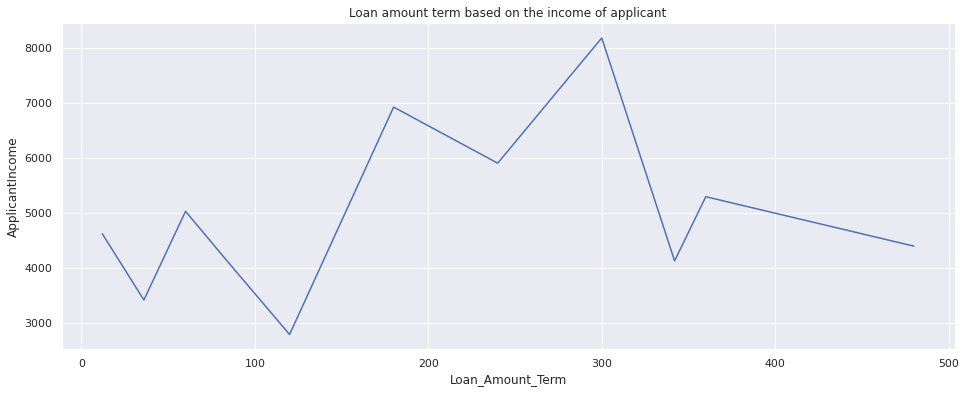

In [24]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Loan_Amount_Term", y="ApplicantIncome", ci=None).set(title='Loan amount term based on the income of applicant')

#### Let's observe if a person's educational qualification impacts in getting loan

#### We can observe that people with atleast a graduate degree have a higher chance of getting their loans approved compared to the on'e who aren't graduates

#### This could also mean the person is looking forward for an education loan to pursue graduation.

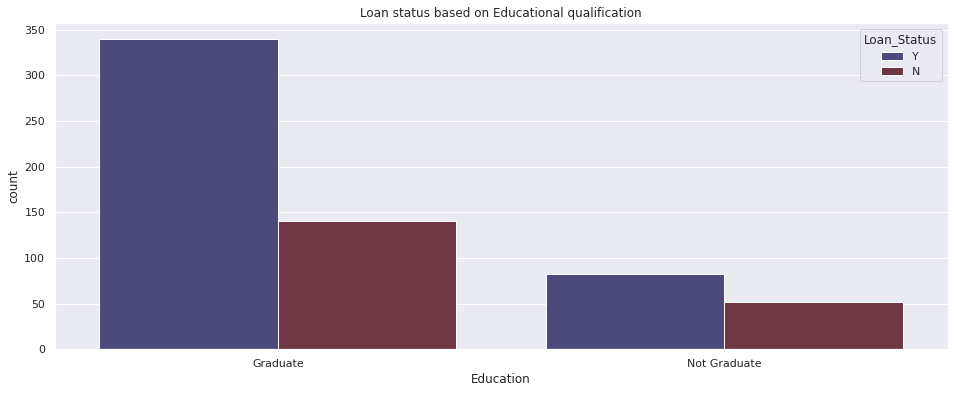

In [25]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Education", hue="Loan_Status", data=df, palette="icefire").set(title='Loan status based on Educational qualification')

#### Let's observe if there is any relationship between the loan status approval and the number of dependents

#### We can see from the plot that as the number of dependents increase the amout of loan also reduces or the approval is likely to happen.

#### Having a dependent could also be a potential indicator of risk as bank may be unsure if the person would be able to pay the amount on time.

#### But if we observe remaining sub plots, people with dependents do get loan aproval and also the rejection of loan is less compared to a person without any dependent.

#### This could also suggest in a way, a dependent could also be a guaranteer for the applicant. Being a family member the credibility would increase exponentially

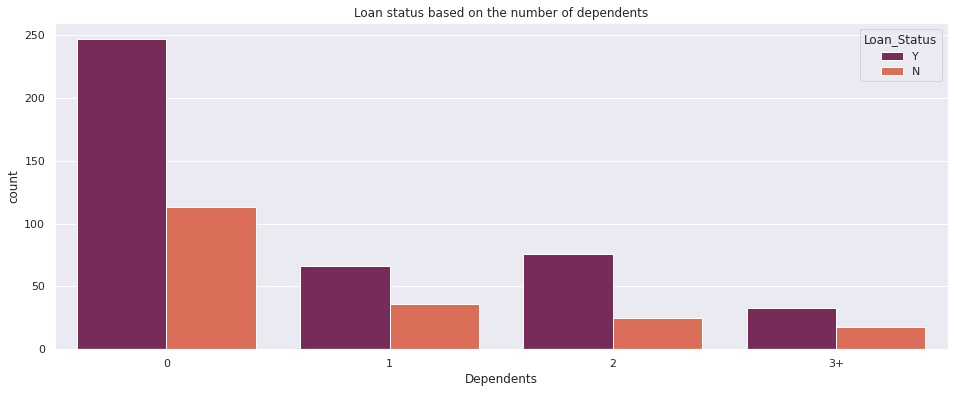

In [26]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette="rocket").set(title='Loan status based on the number of dependents')

#### As described in the previous plot, if a family member stands as a guaranteer or a co-applicant the loan status is likely to get approved.

#### From the below plot we can see the people having more dependents have more need of money and hence the guaranteer plays a major role in getting more amout and long term loans

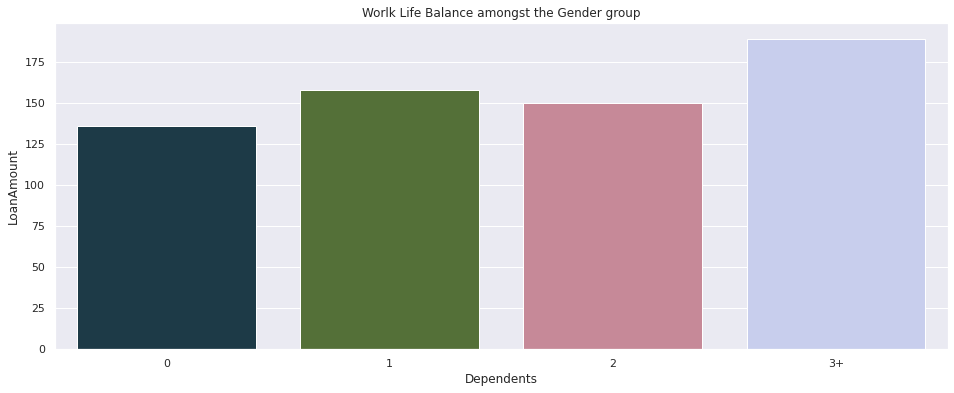

In [27]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Dependents", y="LoanAmount", data=df, palette="cubehelix", orient="v", ci=None).set(title='Worlk Life Balance amongst the Gender group')

# Preprocessing

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### The columns 'Loan_ID', 'Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area'  and 'Loan_Status' converted as follows.

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [7]:
df_new1 = lab_enc.fit_transform(df["Loan_ID"])
df_new2 = lab_enc.fit_transform(df["Gender"])
df_new3 = lab_enc.fit_transform(df["Married"])
df_new4 = lab_enc.fit_transform(df["Dependents"])
df_new5 = lab_enc.fit_transform(df["Education"])
df_new6 = lab_enc.fit_transform(df["Self_Employed"])
df_new7 = lab_enc.fit_transform(df["Property_Area"])
df_new8 = lab_enc.fit_transform(df["Loan_Status"])

In [8]:
df["Loan_ID"] = df_new1
df["Gender"] = df_new2
df["Married"] = df_new3
df["Dependents"] = df_new4
df["Education"] = df_new5
df["Self_Employed"] = df_new6
df["Property_Area"] = df_new7
df["Loan_Status"] = df_new8

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [33]:
df.shape

(614, 13)

# Distribution of all the columns in the dataset


### All the features seem to normally distributed. Since we have multiple features, lets try to identify the distribution

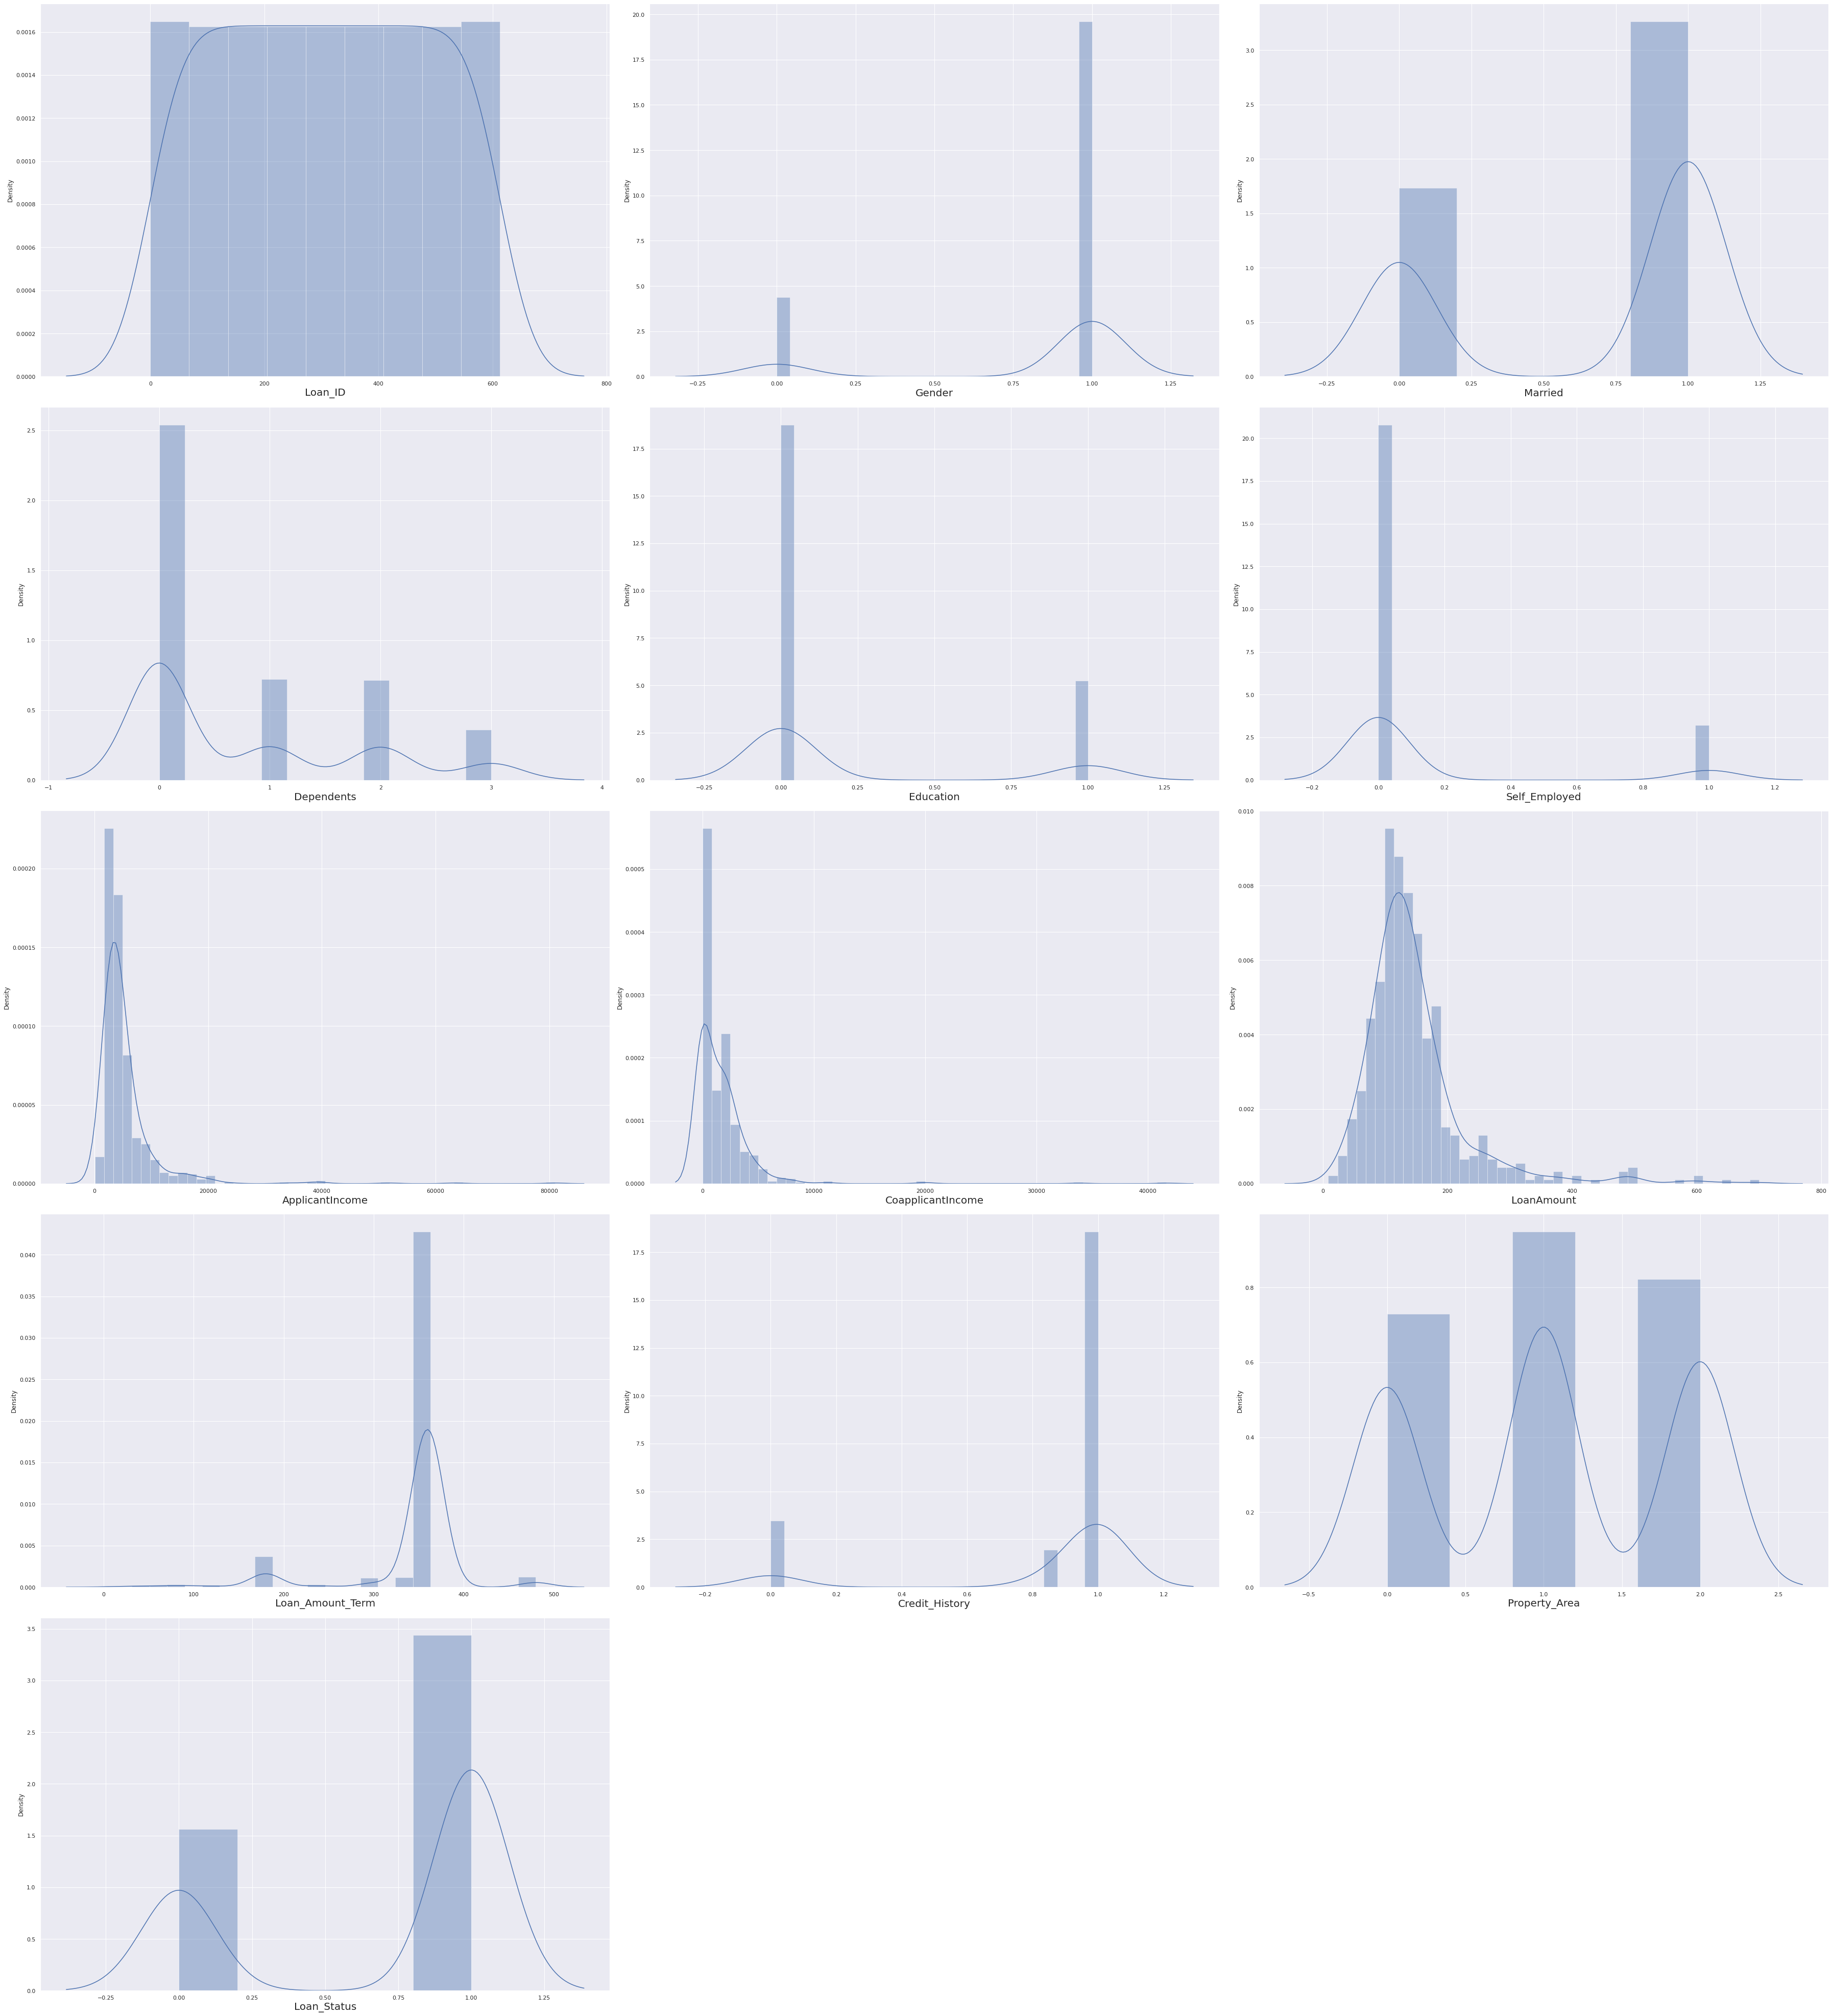

In [34]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=13:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### I have considered columns 'DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate' and 'PercentSalaryHike' as these are the only continous data columns.

### The remaining numerical columns are all in general categorical in nature and applying this method makes no sense.

In [10]:
from scipy.stats import zscore

z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,304.077990,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,347.604853,0.838646,1.031196,0.689775
std,176.726275,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.819095,0.353795,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,303.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,456.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case we are losing only about 6.02% of data after applying z-score

In [11]:
# Percentage data loss:

loss_percent = (614-577)/614*100
print(loss_percent)

6.026058631921824


## Correlation of the features with the dependent variable "Loan_Status"

#### The "Credit_History" seems to have a higher correlation

In [37]:

corr_matrix = df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561857
Married              0.089026
CoapplicantIncome    0.045009
Property_Area        0.026507
Loan_ID              0.023530
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.005003
Loan_Amount_Term    -0.018144
Self_Employed       -0.026525
LoanAmount          -0.035289
Education           -0.092658
Name: Loan_Status, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


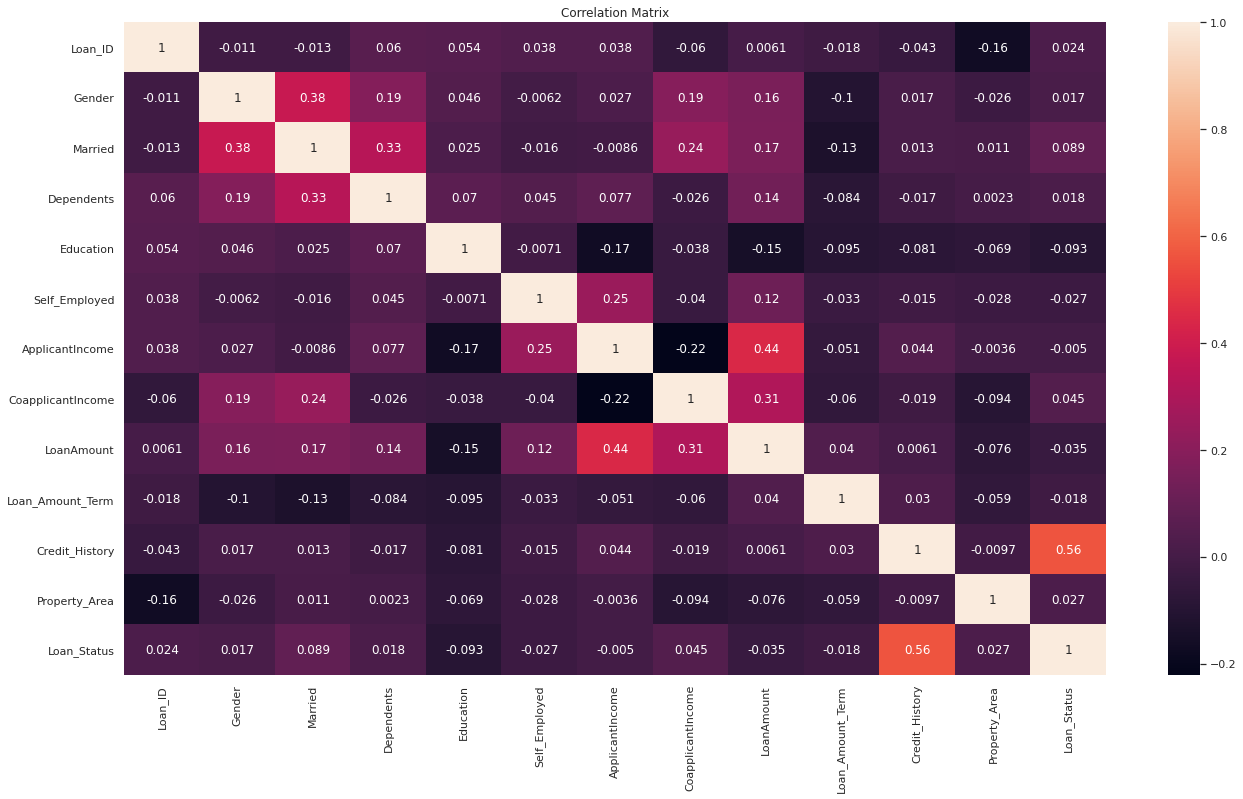

In [38]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [12]:
x = df.drop(columns = ["Loan_Status"], axis=1)
y = df["Loan_Status"]

### Check for skewness of data

#### We can see skewness in the continous variable features 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'Loan_Amount_Term' to some extent.

In [40]:
x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

# Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go


In [13]:
features =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.72210857,  0.47713685, -1.36251079, ...,  0.23940793,
         0.45646138,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  0.23940793,
        -2.37248823, -0.03952504]])

# Power Transformer (yeo-Johnson)
To reduce the skewness to some extent, I have used a Power Transformer technique
Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

## The data is further standardized

In [15]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.316078,0.142609
1,0.234783,0.744117,-0.015871,0.142609
2,-0.527201,-1.122446,-1.443112,0.142609
3,-0.791972,0.895786,-0.169860,0.142609
4,0.728848,-1.122446,0.221481,0.142609
...,...,...,...,...
609,-0.587375,-1.122446,-1.301481,0.142609
610,0.035386,-1.122446,-2.321865,-2.559206
611,1.281658,0.173344,1.838099,0.142609
612,1.164426,-1.122446,0.961555,0.142609


# Check the skewness of the feature dataset
### The skewness seems to have reduced considerably

In [44]:
x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

# Distribution after skewness is removed

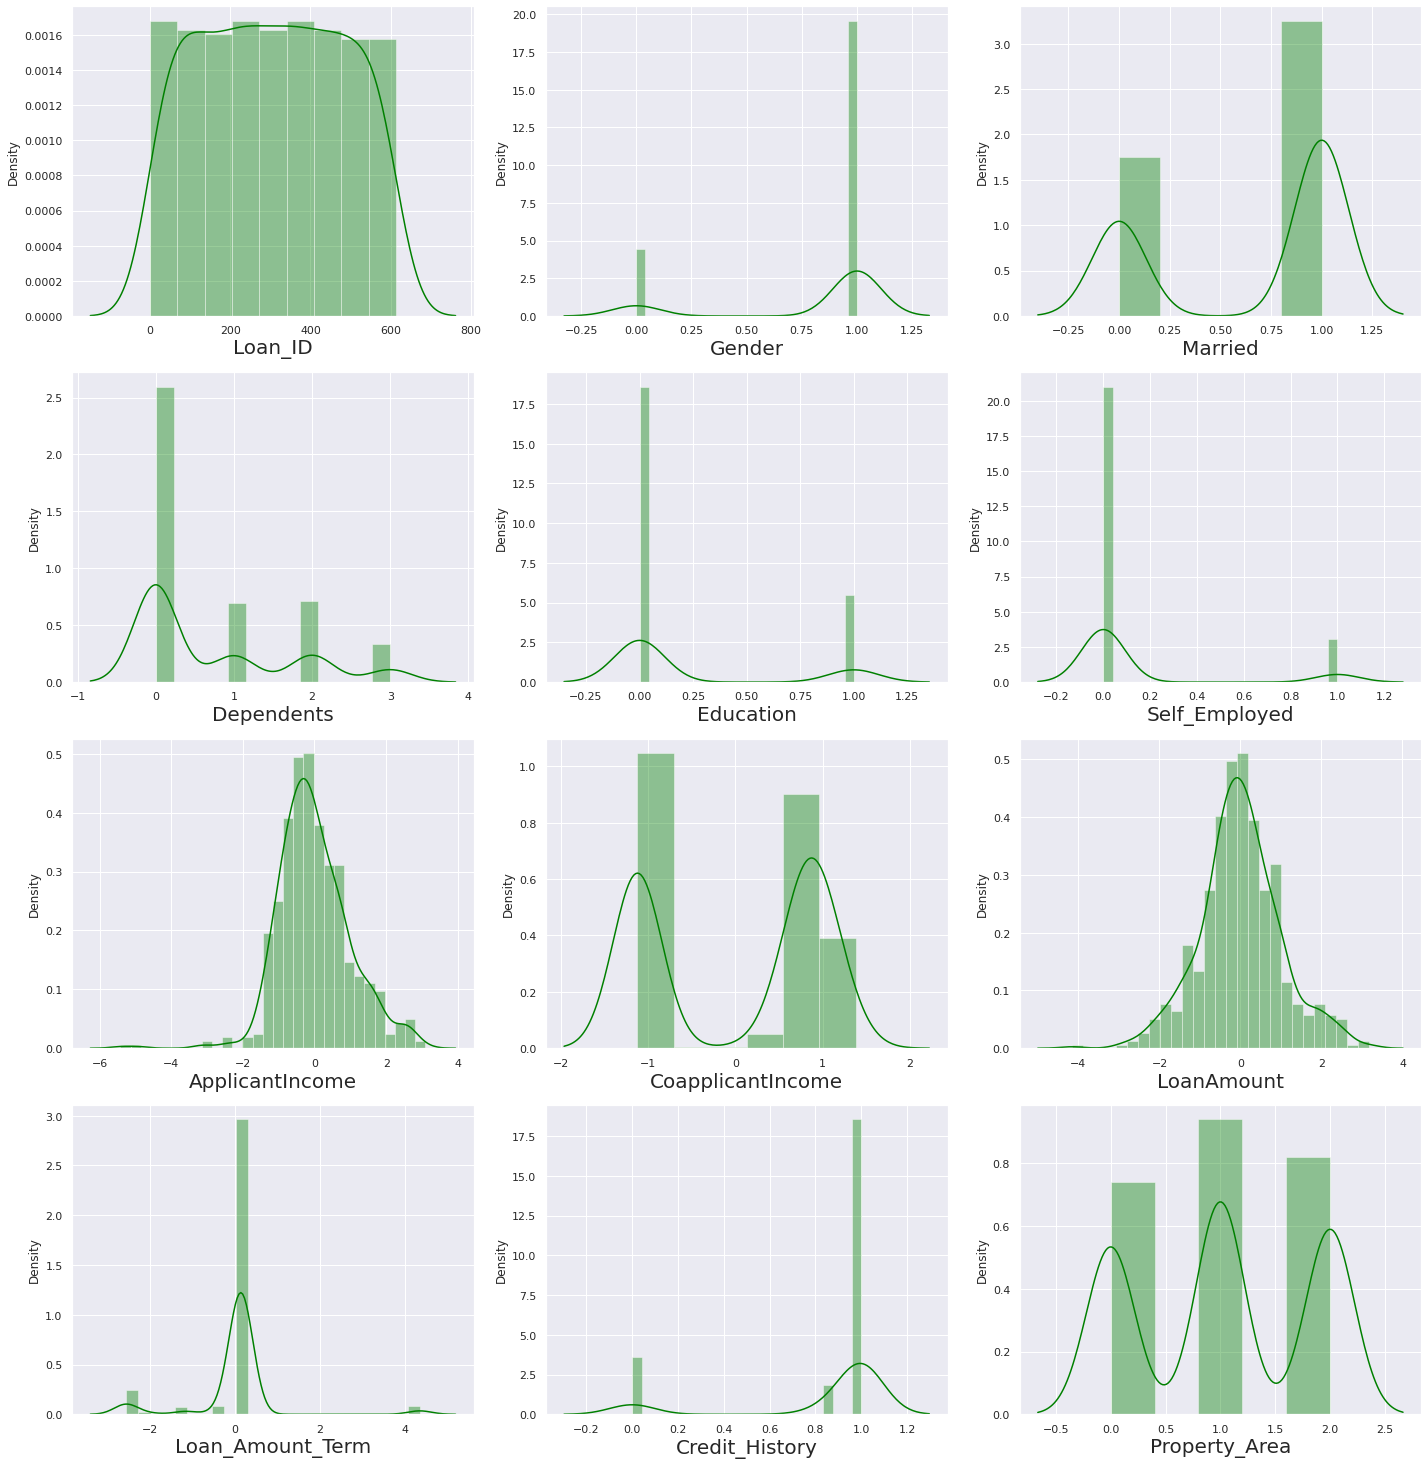

In [45]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=13:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears there is no VIF amongst the features

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.042881,Loan_ID
1,1.205872,Gender
2,1.341323,Married
3,1.176481,Dependents
4,1.075528,Education
5,1.072790,Self_Employed
6,1.632363,ApplicantIncome
7,1.458375,CoapplicantIncome
8,1.663128,LoanAmount
9,1.061829,Loan_Amount_Term


### The column "Loan_ID" doesn't seem to add any value for the model building hence dropping the column.

In [16]:
x.drop(['Loan_ID'], axis = 1, inplace=True)

# Check if the dataset is over sampling or under sampling

In [17]:
df["Loan_Status"].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset.

In [18]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [19]:
y_over.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

# split the dataset into train and test data set

#### I have chosen 200 random state and 30% of data is divided in text dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 5 ML models in thsi scenario

### 1) DecisionTreeClassifier 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7866108786610879
[[99 24]
 [27 89]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.79      0.77      0.78       116

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



### 2) SGDClassifier 

In [67]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train,y_train)

y_pred = sgdc.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7238493723849372
[[ 73  50]
 [ 16 100]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       123
           1       0.67      0.86      0.75       116

    accuracy                           0.72       239
   macro avg       0.74      0.73      0.72       239
weighted avg       0.75      0.72      0.72       239



### 3) RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8158995815899581
[[ 95  28]
 [ 16 100]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       123
           1       0.78      0.86      0.82       116

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



### 4) ExtraTreesClassifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7907949790794979
[[91 32]
 [18 98]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       123
           1       0.75      0.84      0.80       116

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239



### 5) HistGradientBoostingClassifier

In [64]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_grad = HistGradientBoostingClassifier()
hist_grad.fit(x_train,y_train)

y_pred = hist_grad.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7949790794979079
[[95 28]
 [21 95]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       123
           1       0.77      0.82      0.79       116

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.80      0.79      0.79       239



### 6) KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7615062761506276
[[91 32]
 [25 91]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       123
           1       0.74      0.78      0.76       116

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



# Cross validation to check if its overfitting

In [26]:
from sklearn.model_selection import cross_val_score

In [62]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.6932983508245878


In [59]:
scr = cross_val_score(sgdc, x, y, cv=5)
print("Cross Validation score of SGDClassifier model is:", scr.mean())

Cross Validation score of SGDClassifier model is: 0.7038680659670165


In [69]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.7989955022488755


In [29]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.7764167916041979


In [63]:
scr = cross_val_score(hist_grad, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.7852023988005997


In [31]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsClassifier model is:", scr.mean())

Cross Validation score of KNeighborsClassifier model is: 0.715712143928036


# Selecting the best ML model for this dataset

### From the above algorithms HistGradientBoostingClassifier appears to be the best suited model for this dataset in this scenario 

### As the accuracy score is good and the difference between the accuracy score and cross validation score is very less compared to other models.


| Sr.No. | Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeClassifier | 0.786610878661087 | 0.693298350824587 | 0.0933125278365 |
| 2 | SGDClassifier | 0.723849372384937 | 0.703868065967016 | 0.019981306417921 |
| 3 | RandomForestClassifier | 0.815899581589958 | 0.798995502248875 | 0.0169040793410831 |
| 4 | ExtraTreesClassifier | 0.790794979079497 | 0.776416791604197 | 0.0143781874753001 |
| 5 | HistGradientBoostingClassifier | 0.794979079497907 | 0.785202398800599 | 0.00977668069730797 |
| 6 | KNeighborsClassifier | 0.761506276150627 | 0.715712143928036 | 0.0457941322225911 |

# ROC AUC score for all the algorithms

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [72]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.7860597140454164

In [73]:
#ROC AUC score for SGDClassifier

roc_auc_score(y_test, sgdc.predict(x_test))

0.7277824502382955

In [74]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8172133445472385

In [75]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.7923324922904401

In [76]:
#ROC AUC score for HistGradientBoostingClassifier

roc_auc_score(y_test, hist_grad.predict(x_test))

0.7956616204093075

In [77]:
#ROC AUC score for KNeighborsClassifier

roc_auc_score(y_test, k_neigh.predict(x_test))

0.7621600784973366

# ROC AUC score plots

#### We can see the ROC curve shows more for ExtraTreesClassifier. 

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

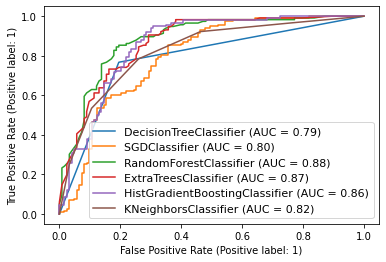

In [78]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(sgdc, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(hist_grad, x_test, y_test, ax=disp.ax_)

plot_roc_curve(k_neigh, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning

### Let us try to tune the proposed model (HistGradientBoostingClassifier) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [144]:
parameters = {"loss":["auto", "binary_crossentropy","categorical_crossentropy"],
              "max_iter":[20, 40, 60, 80, 100],
              "random_state":[30, 60, 90, 120, 150, 180, 200],
              "max_leaf_nodes":[1, 2, 3, 4, 5],
              "verbose":[0, 1, 2],
              "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5]      
            }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [120]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(HistGradientBoostingClassifier(), parameters, cv=5)

In [121]:
GCV.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[28/100] 1 tree, 5 leaves, max depth = 3, in 0.011s
[29/100] 1 tree, 5 leaves, max depth = 3, in 0.008s
[30/100] 1 tree, 5 leaves, max depth = 3, in 0.009s
[31/100] 1 tree, 5 leaves, max depth = 4, in 0.011s
[32/100] 1 tree, 5 leaves, max depth = 4, in 0.010s
[33/100] 1 tree, 5 leaves, max depth = 4, in 0.007s
[34/100] 1 tree, 5 leaves, max depth = 4, in 0.014s
[35/100] 1 tree, 5 leaves, max depth = 4, in 0.011s
[36/100] 1 tree, 5 leaves, max depth = 4, in 0.009s
[37/100] 1 tree, 5 leaves, max depth = 3, in 0.012s
[38/100] 1 tree, 5 leaves, max depth = 3, in 0.010s
[39/100] 1 tree, 5 leaves, max depth = 3, in 0.010s
[40/100] 1 tree, 5 leaves, max depth = 4, in 0.013s
[41/100] 1 tree, 5 leaves, max depth = 4, in 0.011s
[42/100] 1 tree, 5 leaves, max depth = 4, in 0.011s
[43/100] 1 tree, 5 leaves, max depth = 4, in 0.017s
[44/100] 1 tree, 5 leaves, max depth = 3, in 0.007s
[45/100] 1 tree, 5 leaves, max depth = 4, in 0.014s
[46/100] 1 tr

GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingClassifier(l2_regularization=0.0,
                                                      learning_rate=0.1,
                                                      loss='auto', max_bins=255,
                                                      max_depth=None,
                                                      max_iter=100,
                                                      max_leaf_nodes=31,
                                                      min_samples_leaf=20,
                                                      n_iter_no_change=None,
                                                      random_state=None,
                                                      scoring=None, tol=1e-07,
                                                      validation_fraction=0.1,
                                                      verbose=0,
                                                      warm_start=False),
 

In [135]:
GCV.best_params_

{'learning_rate': 0.5,
 'loss': 'auto',
 'max_iter': 40,
 'max_leaf_nodes': 4,
 'random_state': 30,
 'verbose': 0}

### Rebuild the model using the appropriate params we recieved from best_params_


### Its observed that the model accuracy was approximately 79.49 % earlier and post Hyper Parameter tuning its now accuracy decreased to approximately 78.66 %

In [96]:
mod_hist_boost = HistGradientBoostingClassifier(learning_rate= 0.5, loss= "auto", max_iter= 40, max_leaf_nodes= 4, random_state= 30, verbose =0)

mod_hist_boost.fit(x_train,y_train)
pred = mod_hist_boost.predict(x_test)
print(accuracy_score(y_test,pred)*100)

78.66108786610879


# Saving the model (using joblib)

In [161]:
# Saving the model

import joblib
joblib.dump(mod_hist_boost,"Loan_Status_New.pkl")

['Loan_Status_New.pkl']

# Loading the saved model

In [162]:
model = joblib.load("Loan_Status_New.pkl")

In [163]:
prediction = model.predict(x_test)

In [164]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,1
2,0
3,1
4,0
...,...
234,1
235,0
236,1
237,1
